In [1]:
import numpy as np
import osmnx as ox
from geopandas import GeoSeries
from shapely.geometry import Point

np.random.seed(0)
ox.__version__
ox.settings.use_cache= True
ox.settings.log_console = True

In [2]:
G = ox.graph_from_bbox(north=28.5576, south=28.5264, east=77.7078, west=77.6472, network_type="all")
Gp = ox.project_graph(G)
Gc = ox.consolidate_intersections(Gp, rebuild_graph=True, tolerance=20, dead_ends=False)

In [3]:
long_lat = [Point(77.67285946783299, 28.53983395717857), Point(77.6746721, 28.5478431)]

In [4]:
Gc.graph["crs"]

<Projected CRS: EPSG:32643>
Name: WGS 84 / UTM zone 43N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°E and 78°E, northern hemisphere between equator and 84°N, onshore and offshore. China. India. Kazakhstan. Kyrgyzstan. Maldives. Pakistan. Russian Federation. Tajikistan.
- bounds: (72.0, 0.0, 78.0, 84.0)
Coordinate Operation:
- name: UTM zone 43N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
points = GeoSeries(long_lat, crs='wgs84')

In [6]:
points

0    POINT (77.67286 28.53983)
1    POINT (77.67467 28.54784)
dtype: geometry

In [7]:
points_proj = points.to_crs(epsg="32643")

In [8]:
points_proj

0    POINT (761532.893 3159920.791)
1    POINT (761690.507 3160812.564)
dtype: geometry

In [9]:
for pt in points_proj:
    print(pt.x, pt.y)

761532.892998097 3159920.7911789287
761690.5070369361 3160812.563644533


In [10]:
nodes = []
for pt in points_proj:
    nodes.append(ox.nearest_nodes(Gc, pt.x, pt.y))

nodes

[61, 139]

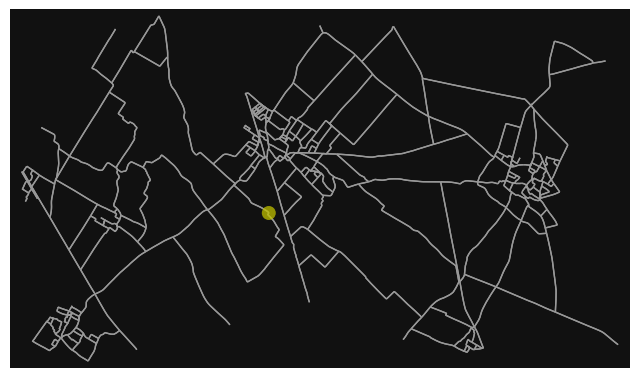

In [11]:
mapx, ax = ox.plot_graph_route(Gc, [nodes[0]], route_color="y", route_linewidth=6, node_size=0)

In [12]:
print(ox.shortest_path(Gc, nodes[0], nodes[1], weight="length"))

[61, 58, 55, 54, 52, 50, 49, 178, 180, 191, 219, 224, 139]


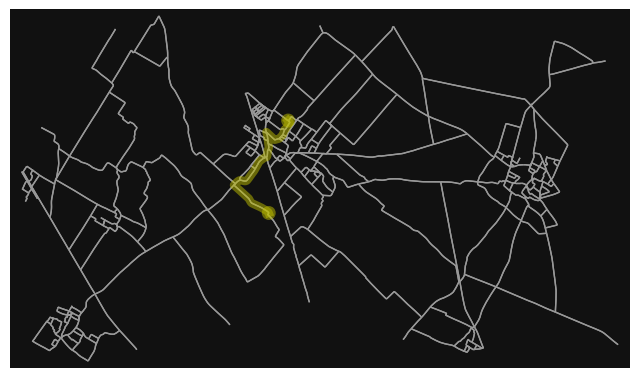

In [13]:
route = ox.shortest_path(Gc, nodes[0], nodes[1], weight="length")
fig, ax = ox.plot_graph_route(Gc, route, route_color="y", route_linewidth=6, node_size=0)

0
120
[0, 2, 77, 62, 59, 57, 55, 54, 52, 50, 49, 178, 179, 48, 211, 212, 215, 177, 37, 128, 126, 125, 32, 156, 145, 115, 114, 116, 118, 120]


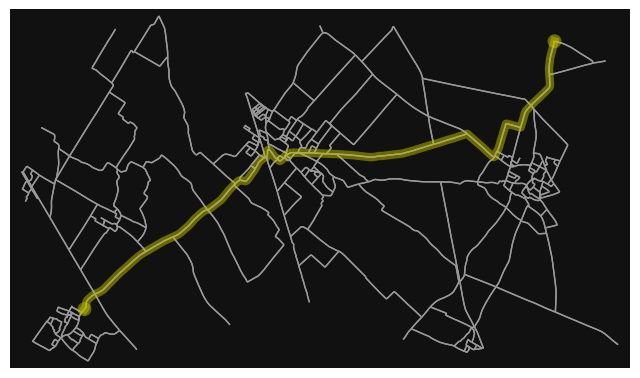

In [14]:


# find the shortest path (by distance) between these nodes then plot it
orig = list(Gc)[0]
dest = list(Gc)[120]
print(orig)
print(dest)
route = ox.shortest_path(Gc, orig, dest, weight="length")
print(route)
fig, ax = ox.plot_graph_route(Gc, route, route_color="y", route_linewidth=6, node_size=0)

